# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Importing necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# Remove and set limit for the number of displayed columns and rows, respectively
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [2]:
#loading the dataset
data = pd.read_csv(r"C:\Users\Soneeka\Documents\Courses\GL - DSBA\Supervised Learning\Classifications\Project 4\INNHotelsGroup.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# Viewing first five rows of the dataset
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# Viewing last five rows of the dataset
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [5]:
# Getting the number of rows and columns
data.shape

(36275, 19)

In [6]:
# Looking at the column data types and counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
# Getting the statistical summary
pd.set_option('display.float_format', lambda x: '%.1f' %x)
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.8,0.5,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.1,0.4,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.8,0.9,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2,1.4,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.0,0.2,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.2,85.9,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.8,0.4,2017.0,2018.0,2018.0,2018.0,2018.0


In [8]:
# Summary of categorical data
cat_cols = data.describe(include=["object"]).columns
for i in cat_cols:
    print("Unique values in", i, "are:")
    print(data[i].value_counts())
    print("_"*50)

Unique values in Booking_ID are:
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64
__________________________________________________
Unique values in type_of_meal_plan are:
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
__________________________________________________
Unique values in room_type_reserved are:
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
__________________________________________________
Unique values in market_segment_type are:
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
________________________

In [9]:
# Checking for unique values in the booking ID column
data["Booking_ID"].nunique()

36275

In [10]:
# Dropping ID column as all are unique
data.drop(["Booking_ID"], axis=1, inplace=True)

In [11]:
# Checking for duplicate values
data.duplicated().sum()

10275

In [12]:
# Cheking for null values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
# Copying original dataset
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate Analysis

In [14]:
# Function to create a labeled barplot
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

In [15]:
# Function to create histogram and boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="orange")
    
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color = "thistle") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2,  color = "thistle")
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

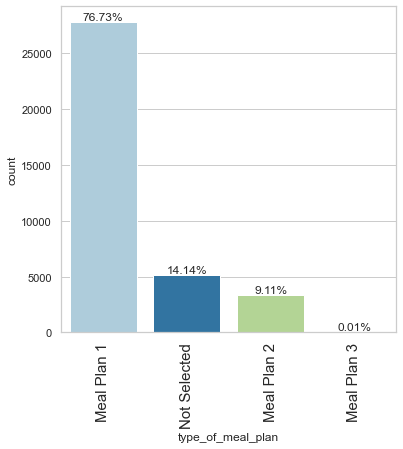

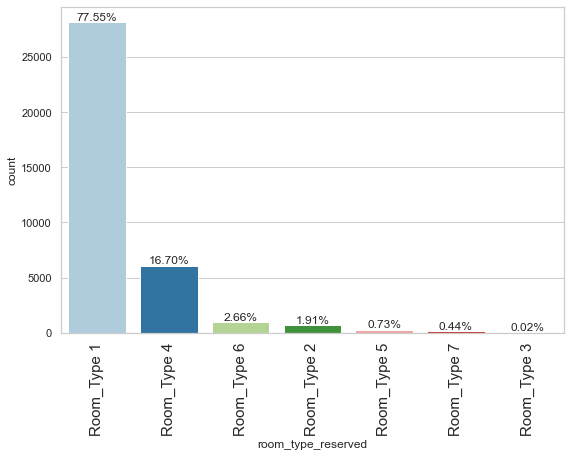

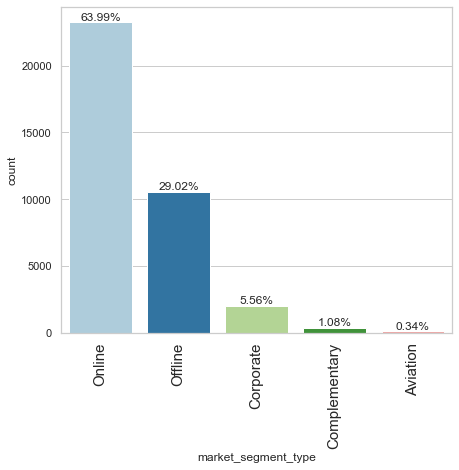

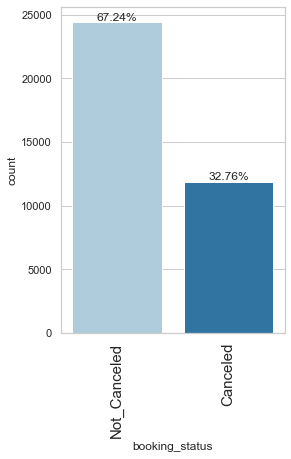

In [16]:
# Plotting categorical data
cat_columns = df.describe(include=["object"]).columns
for col in cat_columns:
    labeled_barplot(df, col, perc=True)

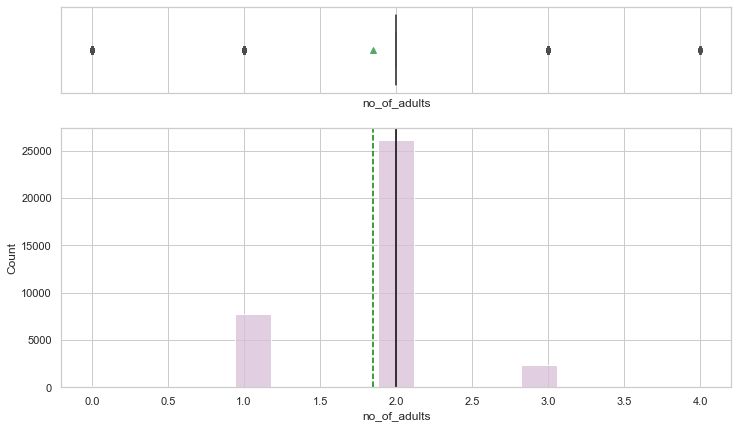

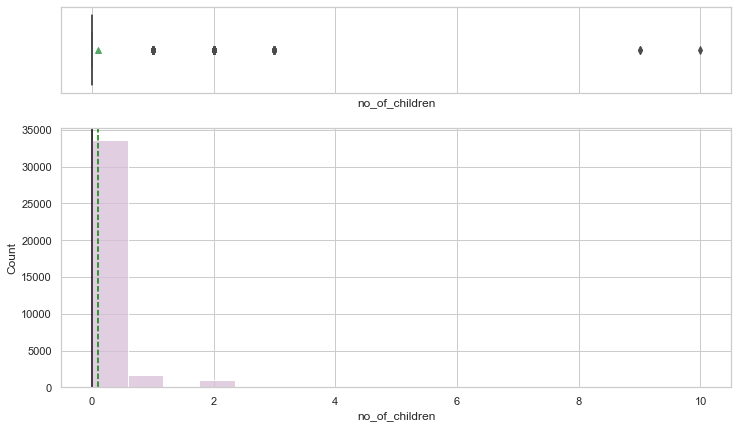

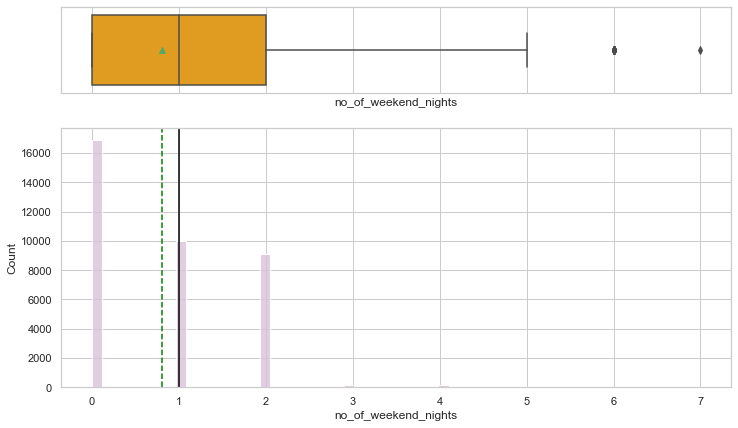

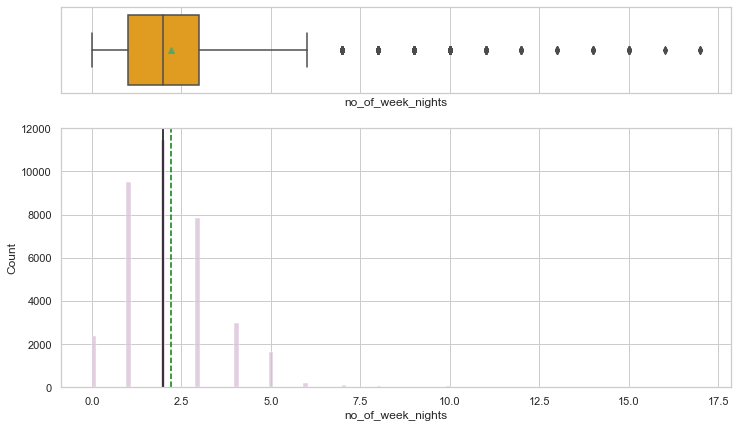

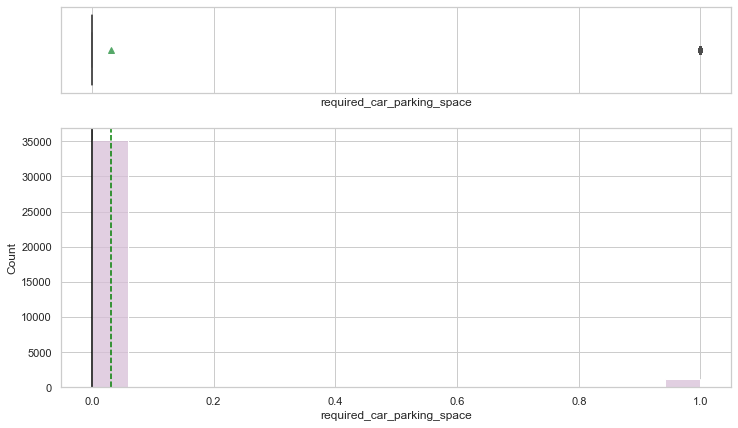

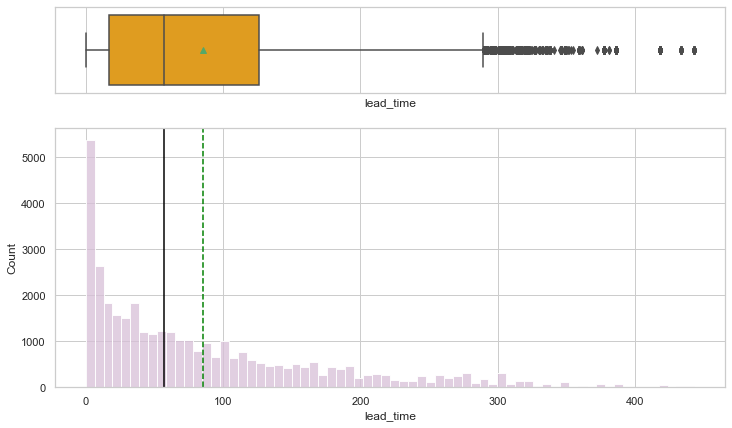

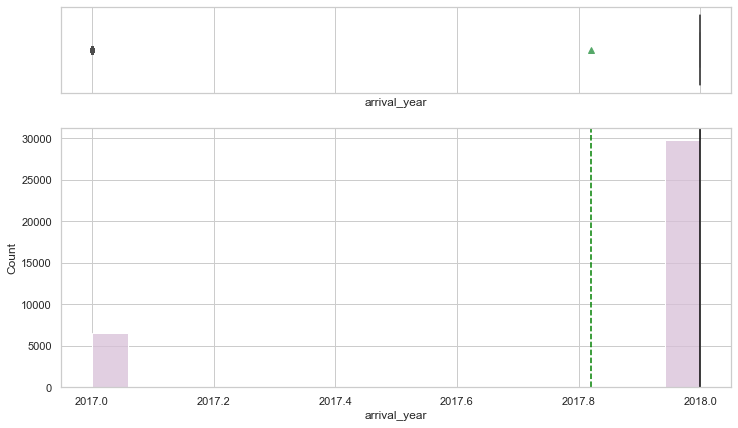

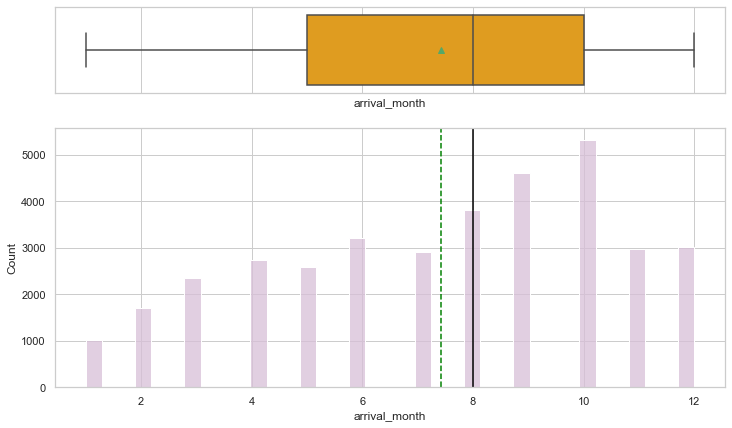

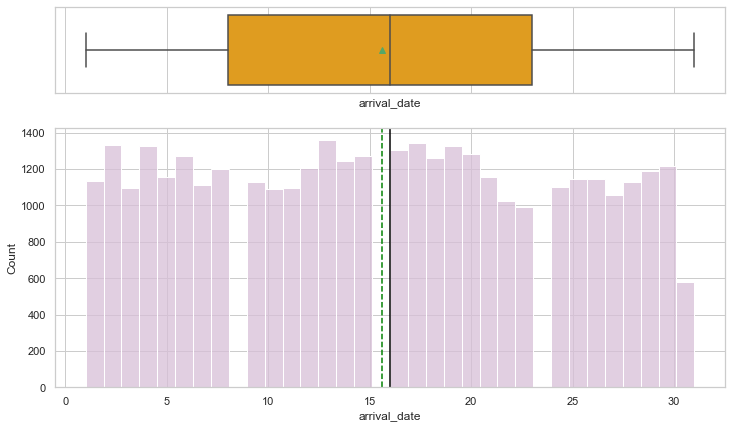

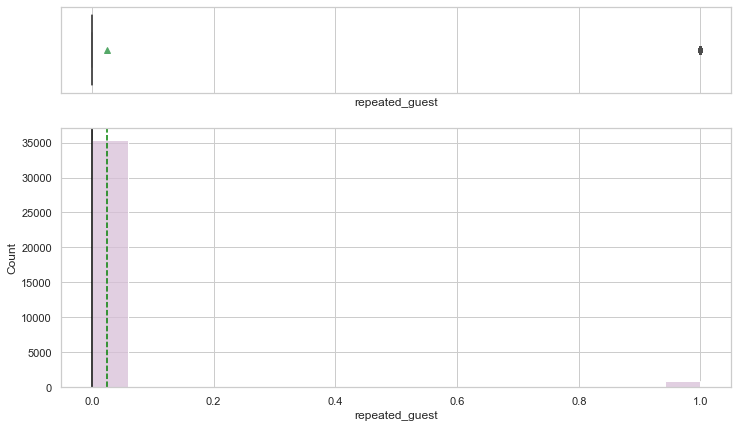

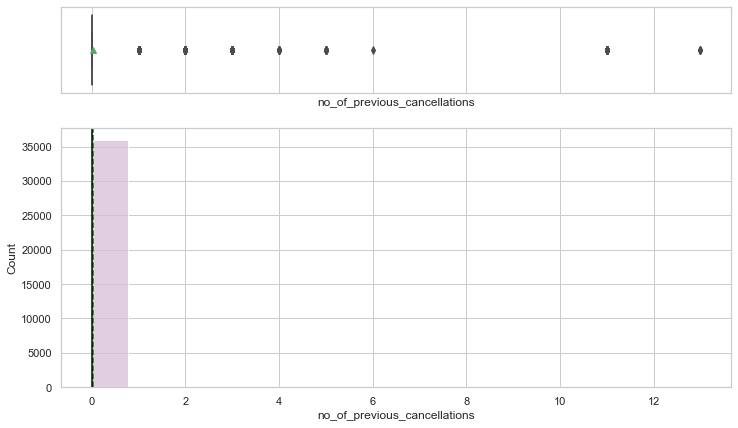

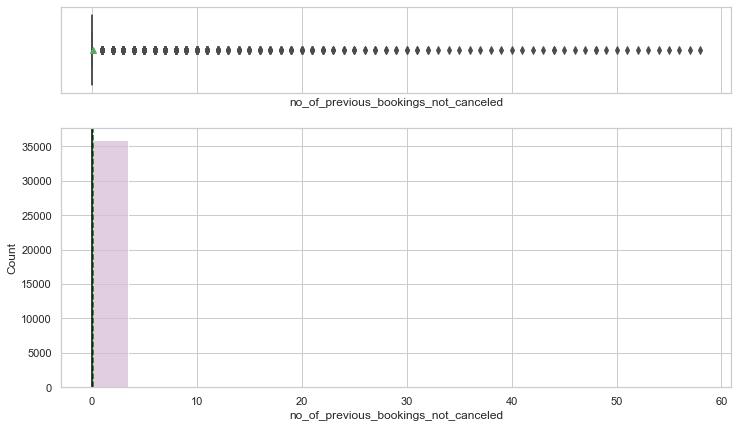

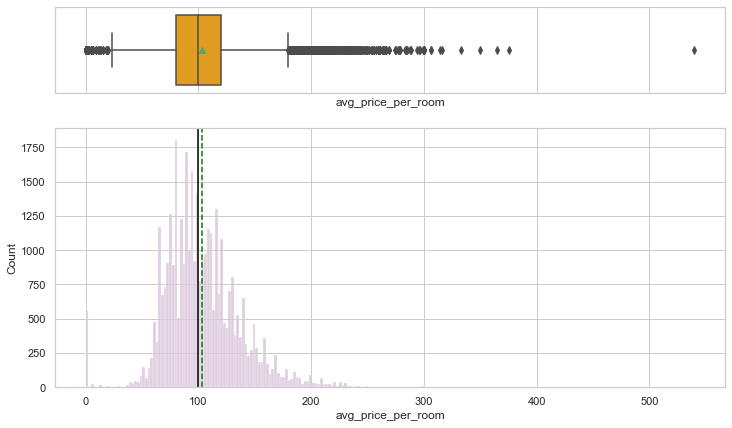

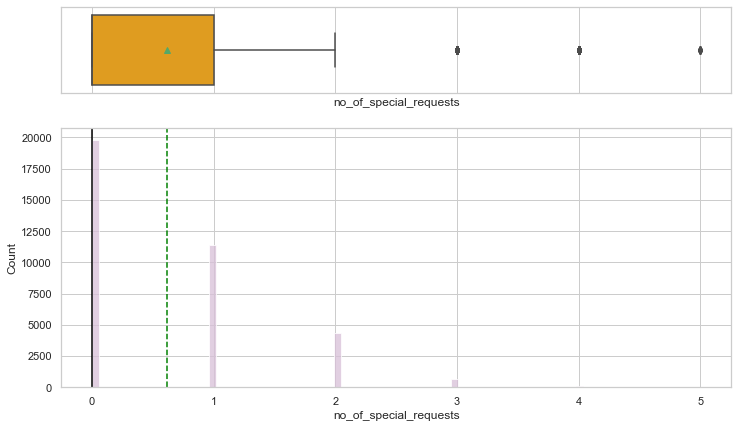

In [17]:
# Plotting numerical data
num_cols = df.describe(include=["int64", "float64"])
for col in num_cols:
    histogram_boxplot(df, col)

## Bivariate Analysis

In [18]:
# Function to create a stacked bar chart
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
# Function to plot distributions with respect to target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

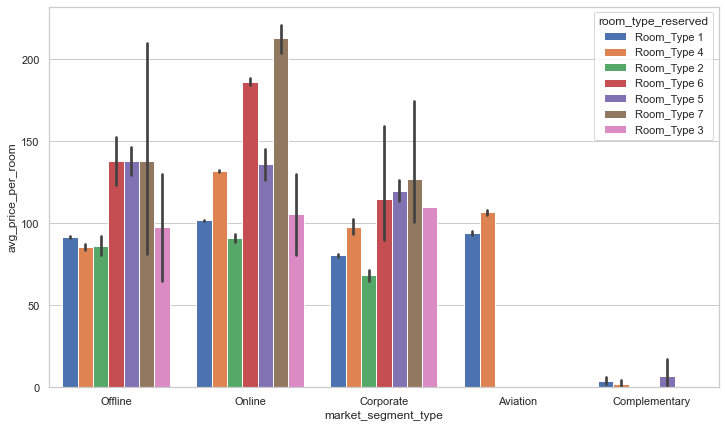

In [20]:
plt.figure(figsize=(12,7))
sns.barplot(data=df, y="avg_price_per_room", x="market_segment_type", hue="room_type_reserved", saturation=5)
plt.show()

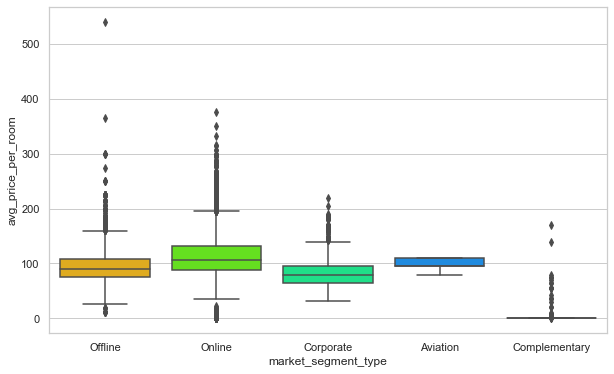

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow")
plt.show()

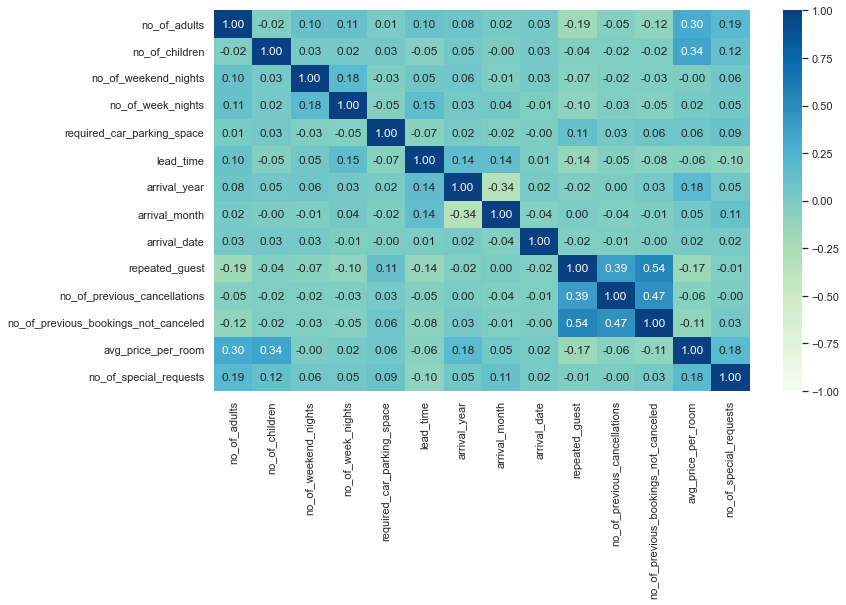

In [22]:
# Plotting correlation heatmap
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="GnBu")
plt.show()

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


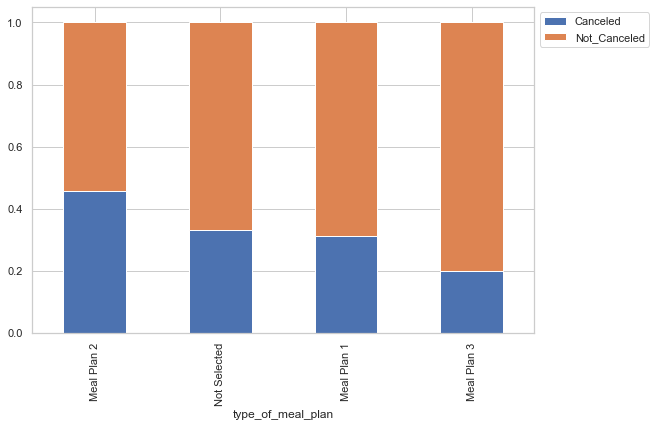

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


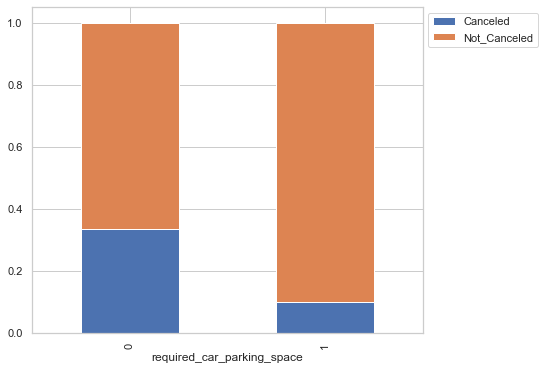

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


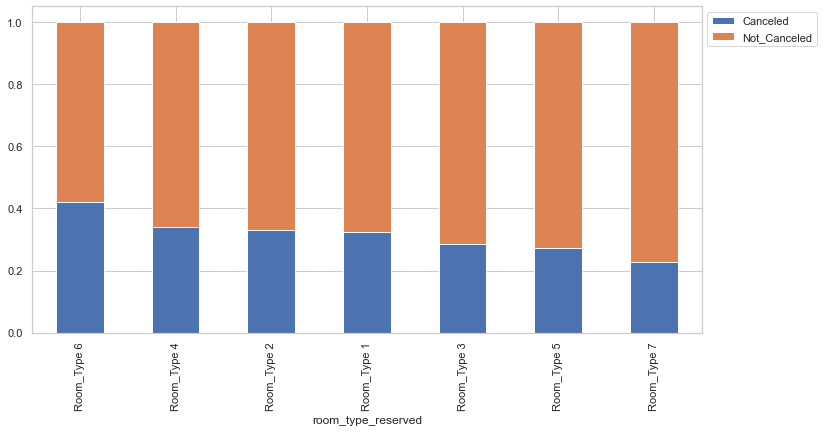

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


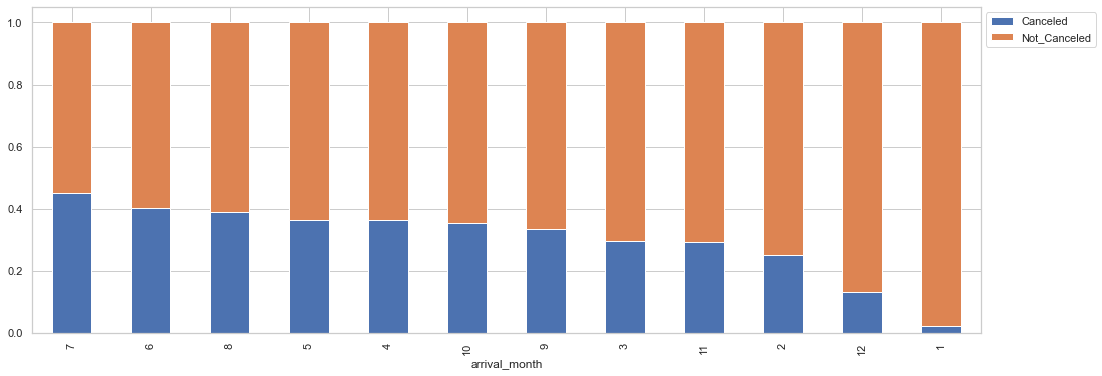

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


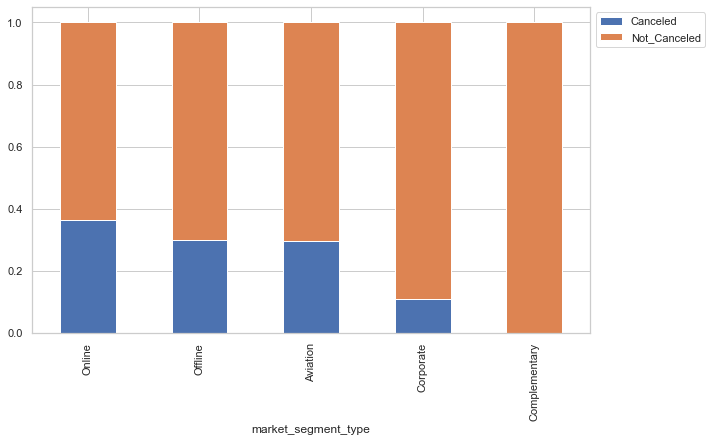

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


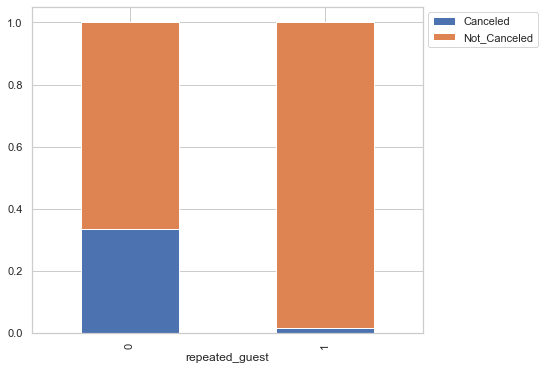

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


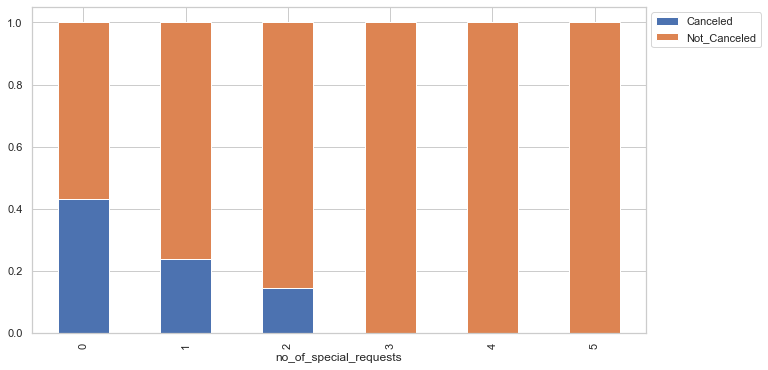

In [23]:
columns = ["type_of_meal_plan","required_car_parking_space","room_type_reserved","arrival_month","market_segment_type","repeated_guest","no_of_special_requests"]
for col in columns:
    stacked_barplot(df, col, "booking_status")

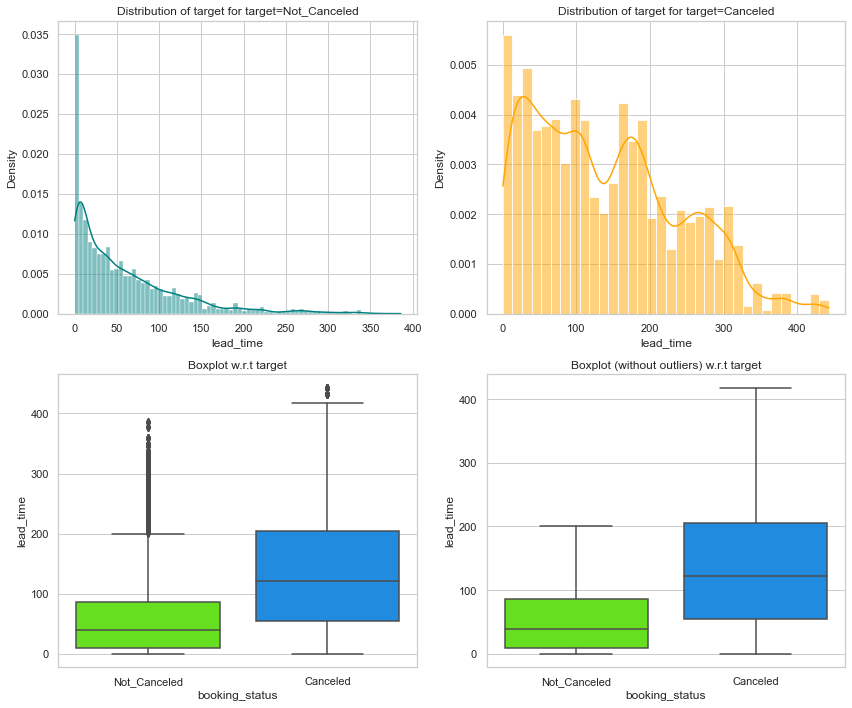

In [24]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

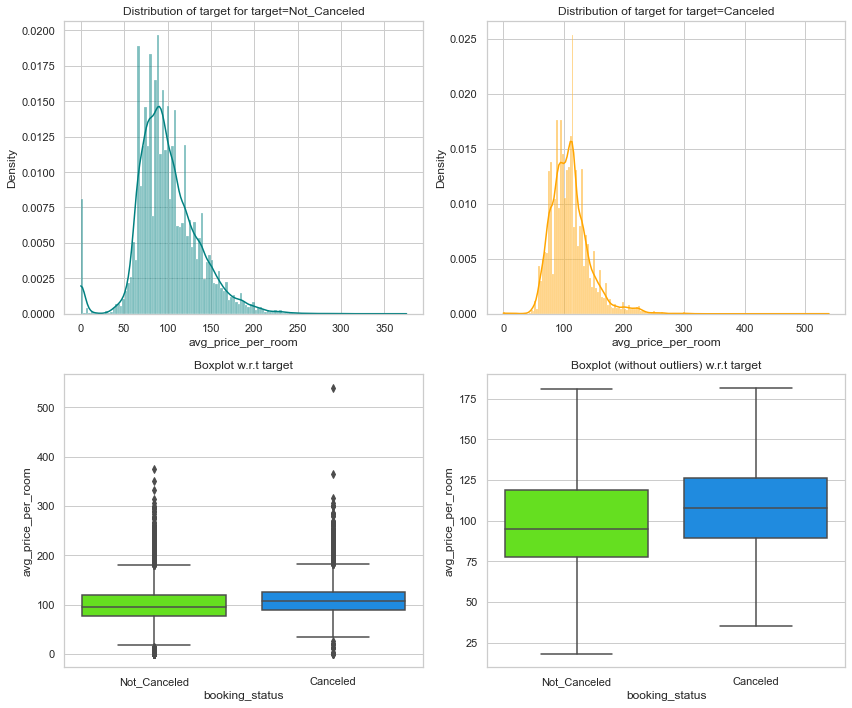

In [25]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

**Leading Questions** (and Answers):
1. What are the busiest months in the hotel?
- The top three and busiest months in the hotel are October, September, and August accounting for ~15%, ~13%, and ~11% of bookings respectively.
- June, November, Decemeber and July follow closely behind.
2. Which market segment do most of the guests come from?
- ~64% of the guests come from the online market, followed by ~29% from the offline market. The remaining 7% are from the other market segments.
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
- The room prices seem to vary greatly across the different market segments.
- In the offline market, room type 5, 6 and 7 cost the same (~\\$140) and are the most expensive room types.
- In the online market, room type 7 is the most expensive costing ~\\$210, followed by room type 6 at ~\\$180, which are the highest for these room types across all market segments. This would be due technology allowing us the ease of booking online, which the data accounts for the majority of guest bookings. The price of room type 4 is similar to room type 5 (both around \\$135), and costs more in the online market, compared to the other market segments.
- Most of the rooms in the corporate market segment cost the lowest compared to the online and offline markets. Room type 7 costs the most, around \\$125, followed by room type 5 at \\$120, and 6 at \\$115. The coporporate guests may have some sort of company membership with the hotel to keep prices lower for the guests coming for work purposes.
- The aviation segment only seems to offer room type 1 and 4. Room type 4 costs around $10-15 more than room type 1. The price ranges between 90-110 and are not too pricey compared to other market segments. This could be due to the frequent fly-in fly-out nature of aviation crew members.
- Complementary rooms are the lowest as they are free of charge.
4. What percentage of bookings are canceled?
- Just over a third (33%) of bookings are canceled.
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
- Out of 11885 repeated guests, only 0.13% have canceled. This is very low which is good for the brand. There is a positive correlation of 0.54 between repeated_guest and no_of_previous_bookings_not_canceled, which also supports the low cancellation rate.
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
- Around 28% of guests cancel that have at least one special requirement. Meaning the majority of guests (72%) cancel without the need of special requirements. We can say there is a small effect on booking cancellation.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

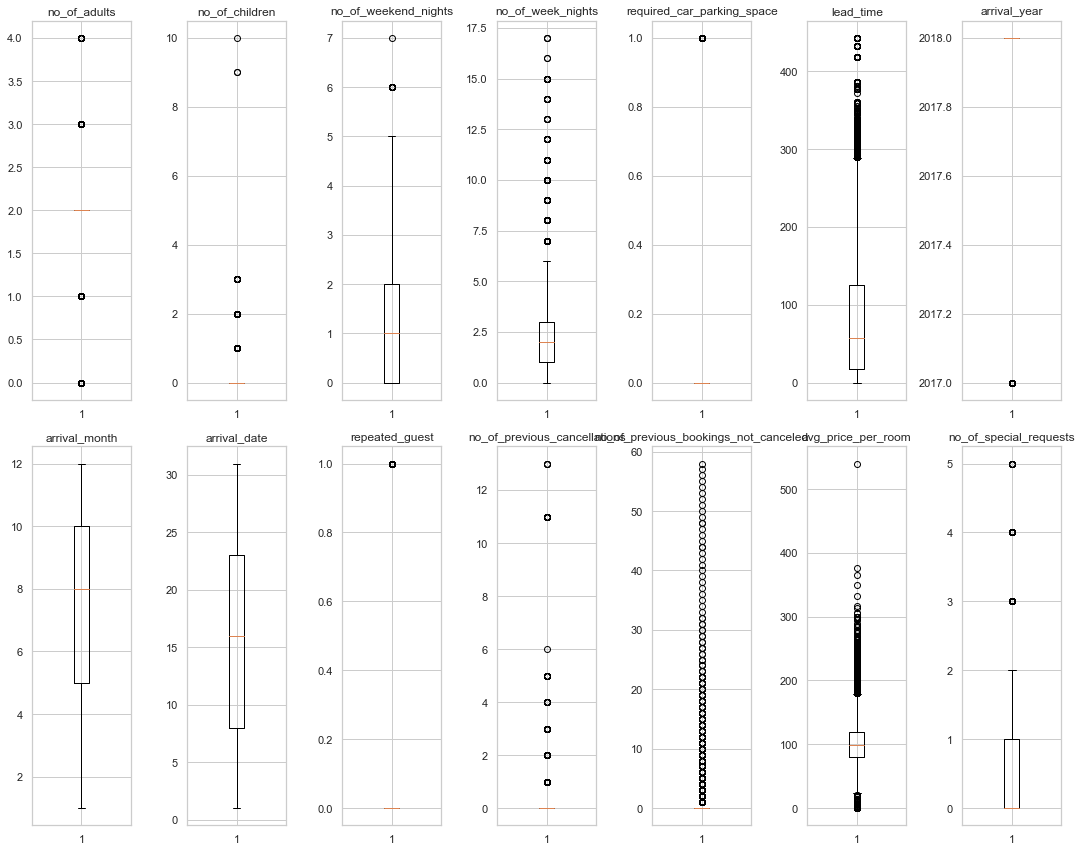

In [26]:
# Outlier detection
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,12))
for i, variable in enumerate(num_cols):
  plt.subplot(2,7,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

In [27]:
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 - 1.5 * iqr
100 - ((df[num_cols]<lw)|(df[num_cols]>uw)).sum()/df.shape[0]*100

no_of_adults                           72.0
no_of_children                         92.6
no_of_weekend_nights                    0.0
no_of_week_nights                       6.6
required_car_parking_space             96.9
lead_time                               0.0
arrival_year                           82.0
arrival_month                           7.5
arrival_date                            0.0
repeated_guest                         97.4
no_of_previous_cancellations           99.1
no_of_previous_bookings_not_canceled   97.8
avg_price_per_room                      3.1
no_of_special_requests                  0.0
dtype: float64

- There are outliers present, however these will not be treated as they are true values related to the context

In [28]:
# Convert lead time into weeks
df['lead_time'] = (df['lead_time'] / 7)

In [29]:
# Add a new column for families
family = df[(df["no_of_children"] >= 1) & (df["no_of_adults"] >= 1)]
family.shape

(2559, 18)

In [30]:
df['family'] = (family["no_of_children"] + family["no_of_adults"])
df['family'] = df['family'].fillna(0)

In [31]:
# Add a new column for the total length of stay
df["length_of_stay"] = (df["no_of_week_nights"] + df["no_of_weekend_nights"])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,family,length_of_stay
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,32.0,2017,10,2,Offline,0,0,0,65.0,0,Not_Canceled,0.0,3
1,2,0,2,3,Not Selected,0,Room_Type 1,0.7,2018,11,6,Online,0,0,0,106.7,1,Not_Canceled,0.0,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,0.1,2018,2,28,Online,0,0,0,60.0,0,Canceled,0.0,3
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,30.1,2018,5,20,Online,0,0,0,100.0,0,Canceled,0.0,2
4,2,0,1,1,Not Selected,0,Room_Type 1,6.9,2018,4,11,Online,0,0,0,94.5,0,Canceled,0.0,2


**Preparing data for modeling**

In [32]:
# Changing the values of booking status where not canceled = 0 and canceled = 1
df['booking_status'].replace({'Not_Canceled':0, 'Canceled':1}, inplace=True)

In [33]:
# Defining dependent and independent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# Adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) 

In [34]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
0   0.7
1   0.3
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.7
1   0.3
Name: booking_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

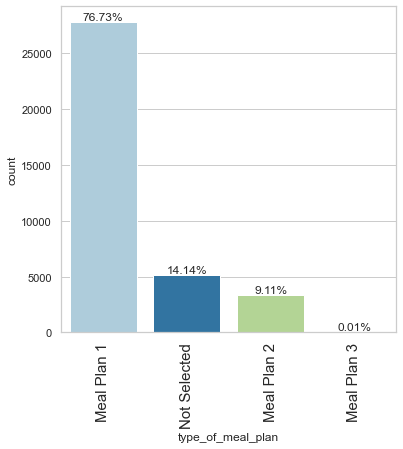

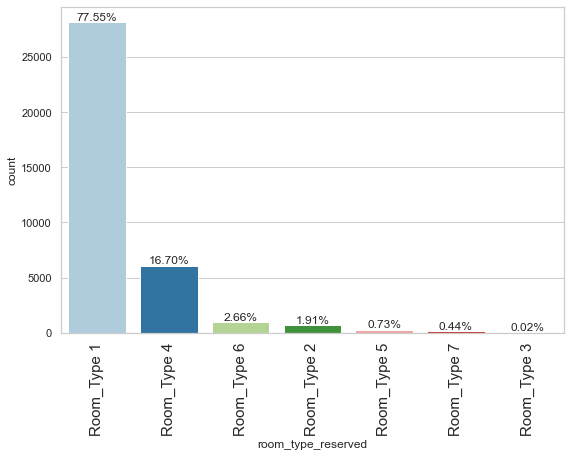

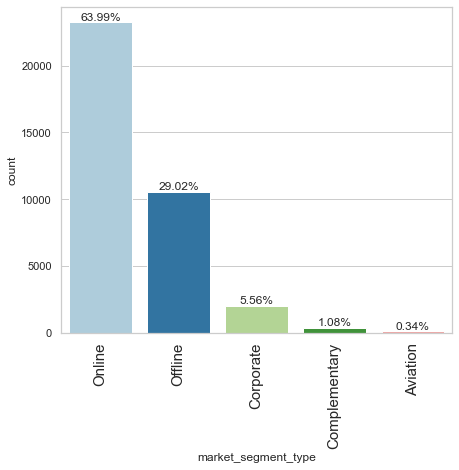

In [36]:
# Plotting categorical data
cat_columns = df.describe(include=["object"]).columns
for col in cat_columns:
    labeled_barplot(df, col, perc=True)

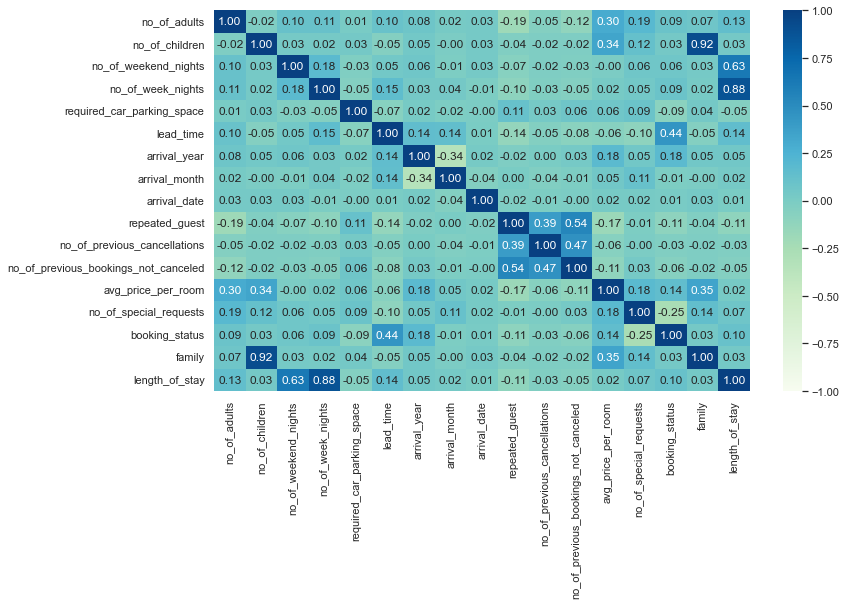

In [37]:
# Plotting correlation heatmap
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="GnBu")
plt.show()

booking_status         0      1    All
type_of_meal_plan                     
All                24390  11885  36275
Meal Plan 1        19156   8679  27835
Not Selected        3431   1699   5130
Meal Plan 2         1799   1506   3305
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


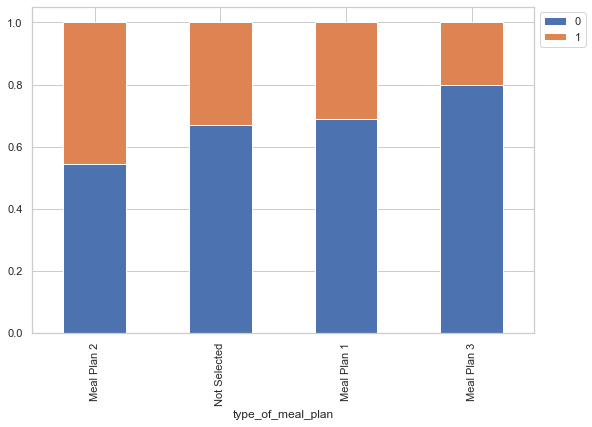

booking_status                  0      1    All
required_car_parking_space                     
All                         24390  11885  36275
0                           23380  11771  35151
1                            1010    114   1124
------------------------------------------------------------------------------------------------------------------------


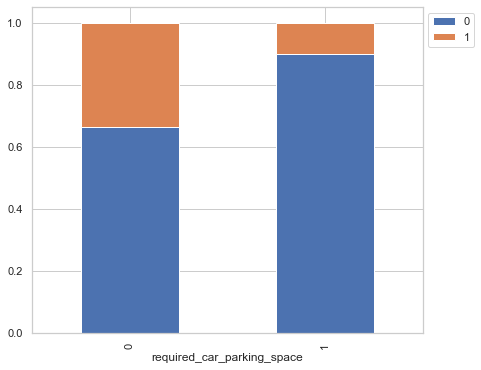

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


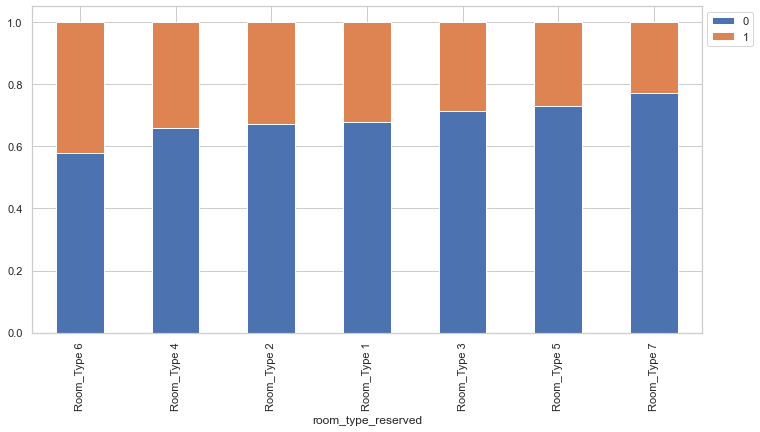

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


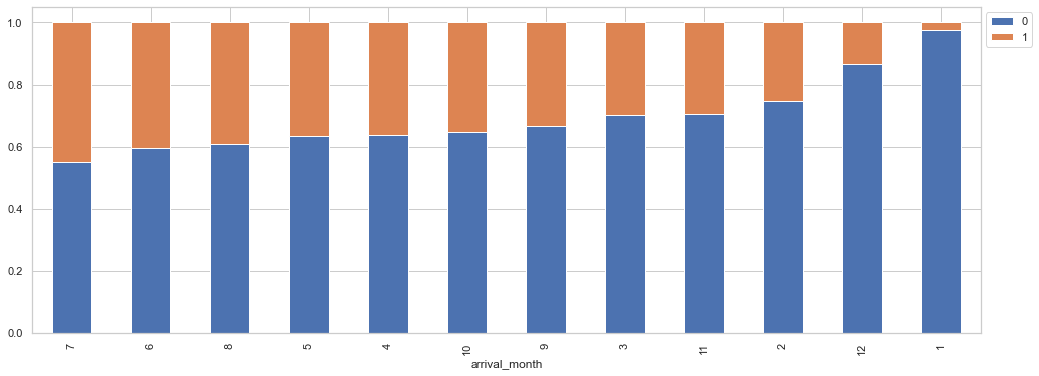

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


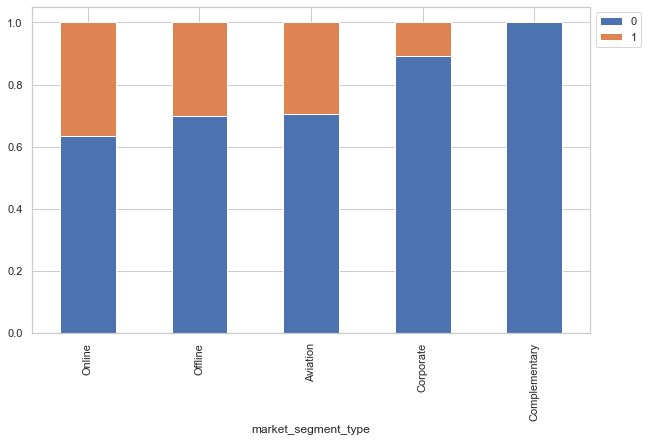

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


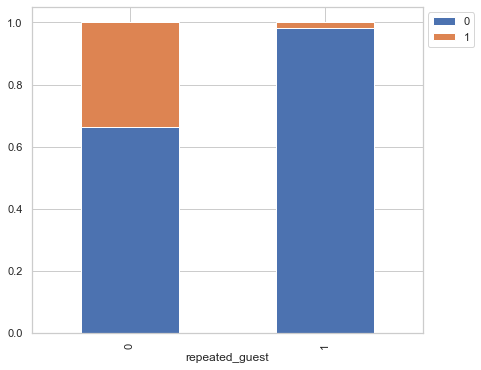

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


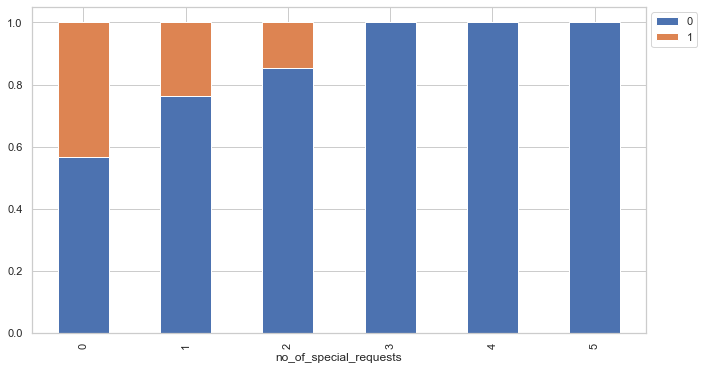

booking_status      0      1    All
family                             
All             24390  11885  36275
0.0             22790  10926  33716
3.0              1020    535   1555
4.0               501    395    896
2.0                67     23     90
5.0                10      5     15
11.0                0      1      1
10.0                1      0      1
12.0                1      0      1
------------------------------------------------------------------------------------------------------------------------


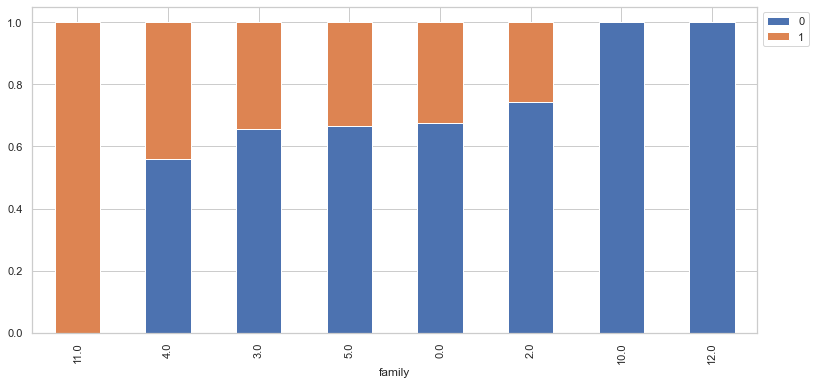

booking_status      0      1    All
length_of_stay                     
All             24390  11885  36275
3                6466   3586  10052
2                5573   2899   8472
4                3952   1941   5893
1                5138   1466   6604
5                1766    823   2589
6                 566    465   1031
7                 590    383    973
8                 100     79    179
10                 51     58    109
9                  58     53    111
14                  5     27     32
15                  5     26     31
13                  3     15     18
12                  9     15     24
11                 24     15     39
20                  3      8     11
16                  1      5      6
19                  1      5      6
17                  1      4      5
18                  0      3      3
21                  1      3      4
22                  0      2      2
0                  76      2     78
23                  1      1      2
24                  0      1

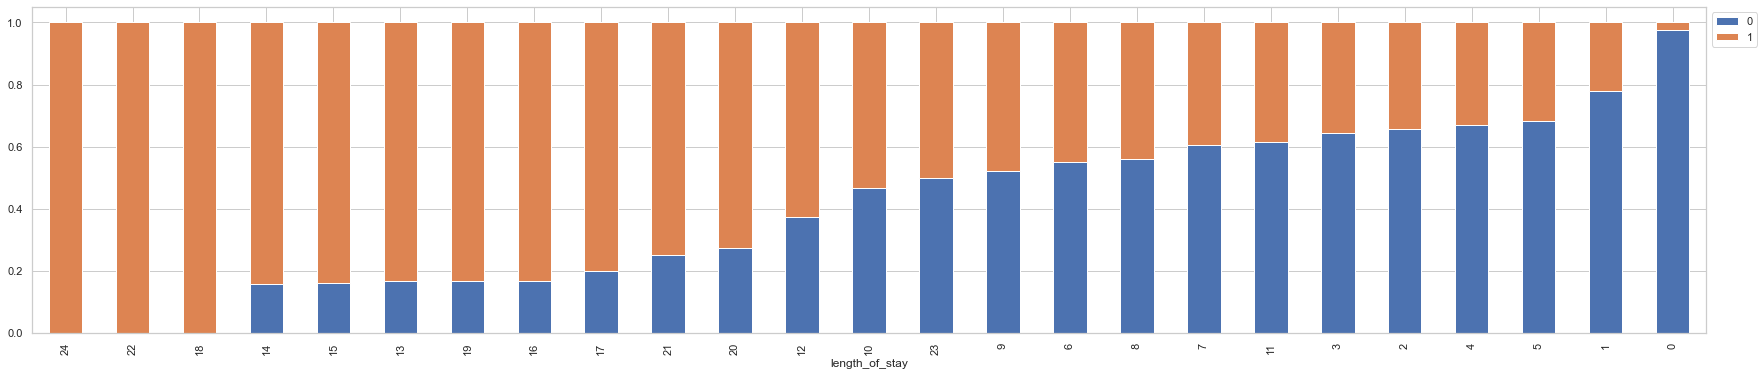

In [38]:
columns = ["type_of_meal_plan","required_car_parking_space","room_type_reserved","arrival_month","market_segment_type","repeated_guest","no_of_special_requests", "family", "length_of_stay"]
for col in columns:
    stacked_barplot(df, col, "booking_status")

**Observations after feature engineering:**
- 76.7% of guests only come for breakfast, followed by 'Not selected' at 14.1%.
- 77.6% book room type 1, which is the most popular.
- 64% of bookings come through the online market segment, and 29% from the offline market.
- There is a positive correlation with the average price per room and families, the more people to book for, the more costly it will be. This could be due to booking bigger rooms that cost more to accomodate for parents and children.
- Around 30% of guests have canceled their booking that have not required car parking space, compared to 10% of canceled bookings that required car parking space.
- Most cancelations happen in the middle of the year during the months of May, June and July. Majority of these cancelations are also not repeated guests.
- The online market has the most cancelations. The offline and aviation markets have about the same percentage of cancelations.
- Longer length of stays are more likely to get canceled.


## Building a Logistic Regression model

**Model prediction notes**

Two cases:
- We predict the guest will not cancel their booking, when they really cancel.
- We predict the guest will cancel their booking, when they do not cancel.

I will chose to use the F1 score because we want to reduce all losses as both cases are just as important. We do not want the hotel to lose customers and taint the company's reputation, or lose on costs and resources for the guest canceling their booking.

In [39]:
# Fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25363
Method:                           MLE   Df Model:                           28
Date:                Thu, 28 Jul 2022   Pseudo R-squ.:                  0.3293
Time:                        17:34:16   Log-Likelihood:                -10792.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -925.4802    120.826     -7.660      0.000   -1162.295    -688.666
no_of_adults                             0.1177      

In [40]:
# Defining a function to compute different metrics to check performance of a classification model
def model_performance_classification_statsmodels(model, predictors, target, threshold):
    pred_temp = model.predict(predictors) > threshold
    pred = np.round(pred_temp)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0])
    return df_perf

In [41]:
# Defining the confusion_matrix_statsmodels function to plot the confusion matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold):
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

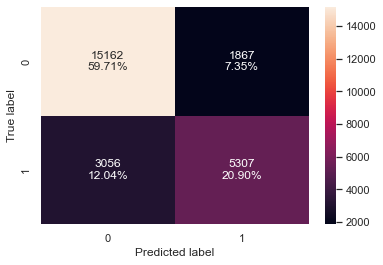

In [42]:
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=0.5)

In [43]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train, threshold=0.5)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.6,0.7,0.7


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [44]:
# Function for calculating the VIF for each variable
def checking_vif(ind_v):
    vif = pd.DataFrame()
    vif["feature"] = ind_v.columns
    vif["VIF"] = [variance_inflation_factor(ind_v.values, i) for i in range(len(ind_v.columns))]
    return vif

In [45]:
checking_vif(X_train)

,feature,VIF
0,const,39468662.7
1,no_of_adults,1.4
2,no_of_children,8.6
3,no_of_weekend_nights,inf
4,no_of_week_nights,inf
5,required_car_parking_space,1.0
6,lead_time,1.4
7,arrival_year,1.4
8,arrival_month,1.3
9,arrival_date,1.0


In [46]:
# Dropping high VIF variables
X_train1 = X_train.drop(['no_of_children'], axis=1)
logit1 = sm.Logit(y_train, X_train1.astype(float))
model1 = logit1.fit(disp=False)
checking_vif(X_train1)

,feature,VIF
0,const,39467608.7
1,no_of_adults,1.3
2,no_of_weekend_nights,inf
3,no_of_week_nights,inf
4,required_car_parking_space,1.0
5,lead_time,1.4
6,arrival_year,1.4
7,arrival_month,1.3
8,arrival_date,1.0
9,repeated_guest,1.8


In [47]:
X_train2 = X_train1.drop(['no_of_weekend_nights'], axis=1)
logit2 = sm.Logit(y_train, X_train2.astype(float))
model2 = logit2.fit(disp=False)
checking_vif(X_train2)

,feature,VIF
0,const,39467608.7
1,no_of_adults,1.3
2,no_of_week_nights,4.4
3,required_car_parking_space,1.0
4,lead_time,1.4
5,arrival_year,1.4
6,arrival_month,1.3
7,arrival_date,1.0
8,repeated_guest,1.8
9,no_of_previous_cancellations,1.4


In [48]:
# Dropping high p-values
cols = X_train2.columns.tolist()

max_p_value = 1

while len(cols) > 0:
    x_train_aux = X_train[cols]
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)
    p_values = model.pvalues
    max_p_value = max(p_values)
    feature_with_p_max = p_values.idxmax()
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'family', 'length_of_stay', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [49]:
X_train3 = X_train2[selected_features]
X_test1 = X_test[selected_features]

In [50]:
# Fitting logistic regression model 3 as the final model
logit3 = sm.Logit(y_train, X_train3.astype(float))
model3 = logit3.fit(disp=False)

print(model3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 28 Jul 2022   Pseudo R-squ.:                  0.3282
Time:                        17:34:20   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.1417    120.472     -7.613      0.000   -1153.262    -681.022
no_of_adults                       0.0969      0.037      2.619      0.

- Positive coefficient values show the probability of a customer canceling their booking increases with the increase of the corresponding attribute.
- Negative coefficient values show the probability of a customer canceling their booking decreaeses with the increase of the corresponding attribute.


In [51]:
# Looking at log(odds) and converting coefficients to odds
odds = np.exp(model3.params)
perc_change_odds = (np.exp(model3.params) - 1) * 100

pd.set_option("display.max_columns", None)
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,no_of_adults,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,family,length_of_stay,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.1,0.9,0.2,1.1,1.6,1.0,0.1,1.3,1.0,0.2,1.1,1.1,1.2,1.3,0.8,0.8,0.5,0.4,0.3,0.5,0.2
Change_odd%,-100.0,10.2,-6.5,-79.7,11.6,57.3,-4.1,-93.6,25.8,1.9,-77.0,5.4,11.5,18.1,33.1,-24.9,-24.3,-51.8,-58.8,-75.0,-54.9,-83.3


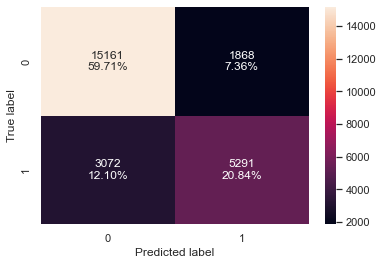

In [52]:
# Checking performance on training set
confusion_matrix_statsmodels(model3, X_train3, y_train, threshold=0.5)

In [53]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(model3, X_train3, y_train, threshold=0.5)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.6,0.7,0.7


In [54]:
# Dropping columns on testing set that were dropped on training set model 3
X_test2 = X_test1[list(X_train3.columns)]

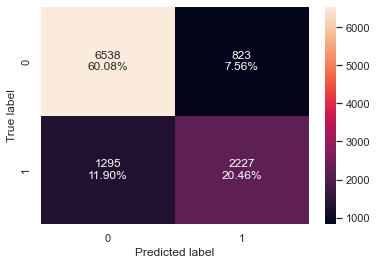

In [55]:
# Checking performance on testing set
confusion_matrix_statsmodels(model3, X_test2, y_test, threshold=0.5)

In [56]:
print("Testing performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(model3, X_test2, y_test, threshold=0.5)
log_reg_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.6,0.7,0.7


- The model is giving the same F1 score on both train and test sets (0.7).
- The model does not seem to be overfitting, however, the F1 score could be improved.

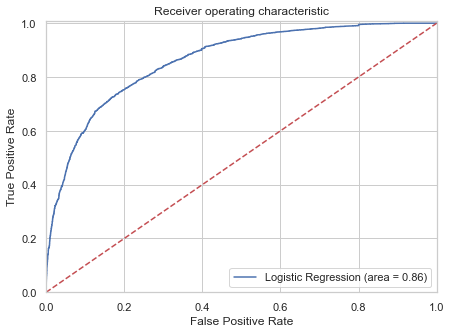

In [57]:
# Looking at ROC-AUC
logit_roc_auc_train = roc_auc_score(y_train, model3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, model3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [58]:
# Finding optimal threshold
fpr, tpr, thresholds = roc_curve(y_train, model3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37119413410086693


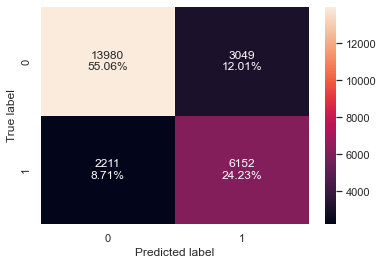

In [59]:
# Checking performance on training set
confusion_matrix_statsmodels(model3, X_train3, y_train, threshold=optimal_threshold_auc_roc)

In [60]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    model3, X_train3, y_train, threshold=optimal_threshold_auc_roc)

print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.7,0.7,0.7


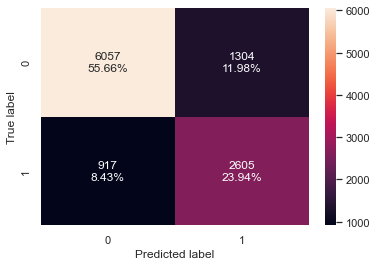

In [61]:
# Checking performance on testing set
confusion_matrix_statsmodels(model3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [62]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    model3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.7,0.7,0.7


- Only the recall has increased from 0.6 to 0.7, all other metrics have stayed the same.

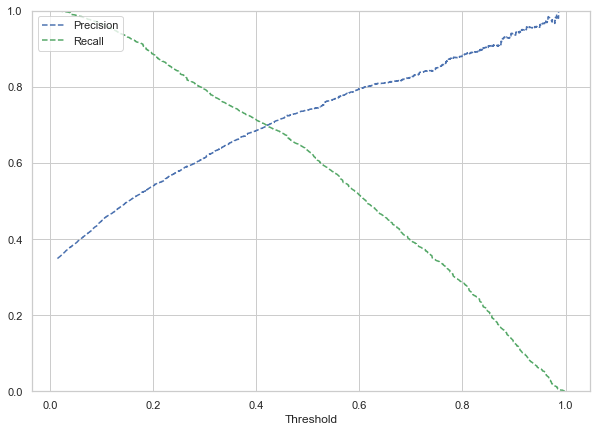

In [63]:
# Plotting precision-recall curve
y_scores = model3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [64]:
# Setting the optimal threshold value
optimal_threshold_curve = 0.42

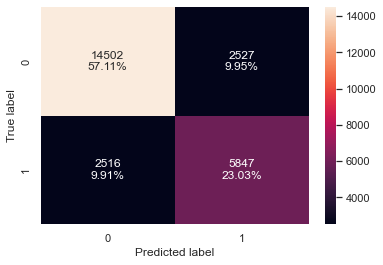

In [65]:
# Checking training set performance
confusion_matrix_statsmodels(model3, X_train3, y_train, threshold=optimal_threshold_curve)

In [66]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    model3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.7,0.7,0.7


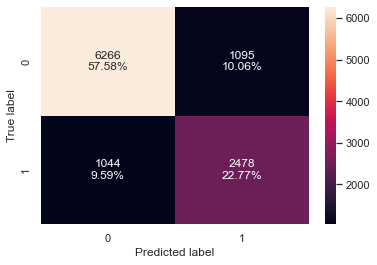

In [67]:
# Checking testing set performance
confusion_matrix_statsmodels(model3, X_test2, y_test, threshold=optimal_threshold_curve)

In [68]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    model3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Testing performance:")
log_reg_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.7,0.7,0.7


- There seems to be no change to the metric values after finding the optmial threshold

## Model performance evaluation

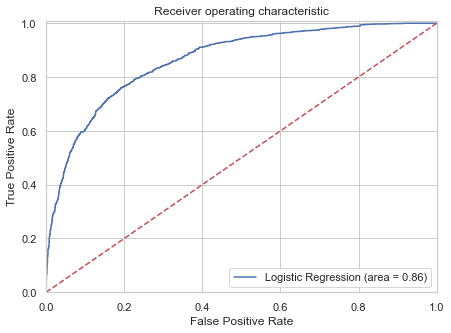

In [69]:
logit_roc_auc_train = roc_auc_score(y_test, model3.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, model3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

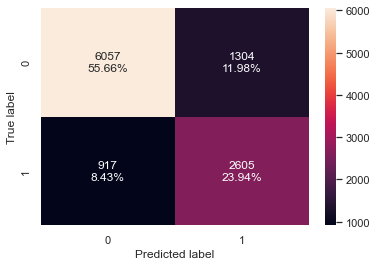

In [70]:
# Checking test set performance with threshold at 0.37
confusion_matrix_statsmodels(model3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [71]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    model3, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.7,0.7,0.7


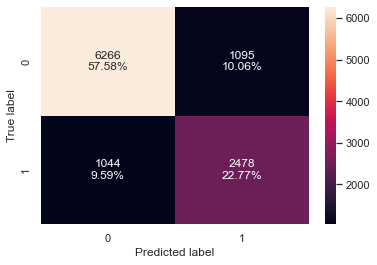

In [72]:
# Checking test set performance with threshold at 0.42
confusion_matrix_statsmodels(model3, X_test2, y_test, threshold=optimal_threshold_curve)

In [73]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    model3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.8,0.7,0.7,0.7


## Final Model Summary

In [74]:
# Training set performance comparison
train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.8,0.8,0.8
Recall,0.6,0.7,0.7
Precision,0.7,0.7,0.7
F1,0.7,0.7,0.7


In [75]:
# Testing set performance comparison
test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
test_comp_df

Testing performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.8,0.8,0.8
Recall,0.7,0.7,0.7
Precision,0.7,0.7,0.7
F1,0.7,0.7,0.7


- Overall, the model performs well on both the training and testing sets, without overfitting.
- There is not much improvement in the model performance from the default threshold 0.5 compared to the auc-roc and optimal thresholds.
- We can select the optimal threshold (0.42) as the final model as it gives better false positive/negative percentages in the confusion matrix compared to the onfusion matrix with threshold 0.37.

## Building a Decision Tree model

In [76]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [77]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 29)
Shape of test set :  (10883, 29)
Percentage of classes in training set:
0   0.7
1   0.3
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.7
1   0.3
Name: booking_status, dtype: float64


In [78]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [79]:
# Defining a function to compute different metrics to check performance of a classification model
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
    return df_perf

In [80]:
# Defining the confusion_matrix_statsmodels function to plot the confusion matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

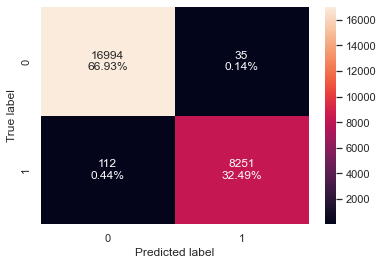

In [81]:
# Checking performance on training set
confusion_matrix_sklearn(model, X_train, y_train)

In [82]:
dtree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
dtree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


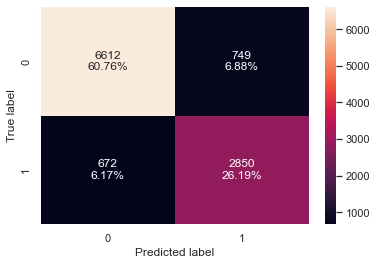

In [83]:
# Checking performance on testing set
confusion_matrix_sklearn(model, X_test, y_test)

In [84]:
dtree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
dtree_perf_test

,Accuracy,Recall,Precision,F1
0,0.9,0.8,0.8,0.8


- The model has perfectly classified the data on the training set which means there is a chance of overfitting on the testing set.

## Do we need to prune the tree?

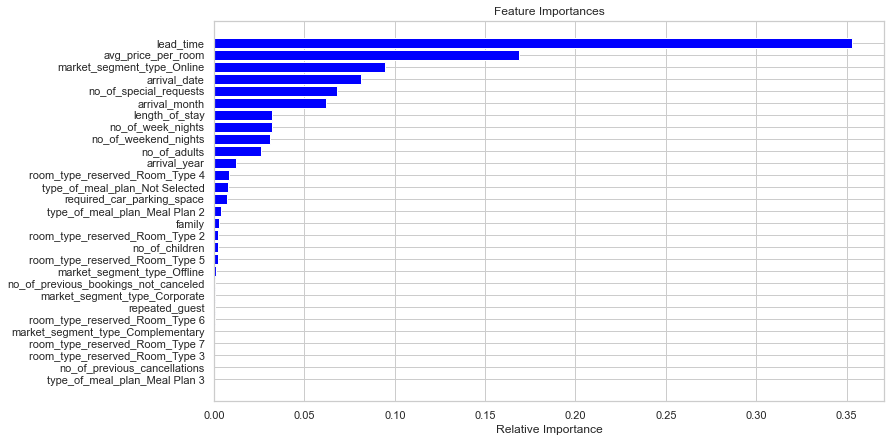

In [85]:
# Looking at the important features in the dataset
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Top three important features currently are lead_time, avg_price_per_room and market_segment_type_Online.

**Pre-pruning**

In [86]:
# Choosing the type of classifier, hyperparameters, and F1 score
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

acc_scorer = make_scorer(f1_score)

# Running grid search cv and set estimator
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_

# Fitting the best algorithm
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

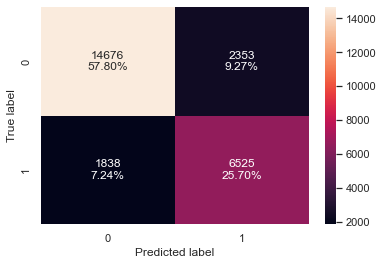

In [87]:
# Checking training set performance
confusion_matrix_sklearn(estimator, X_train, y_train)

In [88]:
dtree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
dtree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.8,0.8,0.7,0.8


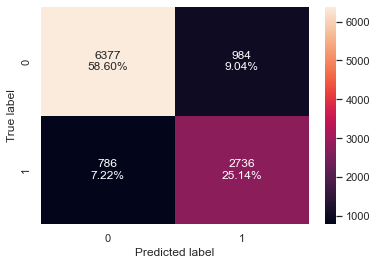

In [89]:
# Checking testing set performance
confusion_matrix_sklearn(estimator, X_test, y_test)

In [90]:
dtree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
dtree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.8,0.8,0.7,0.8


- The model seems to generalise well on the testing set.

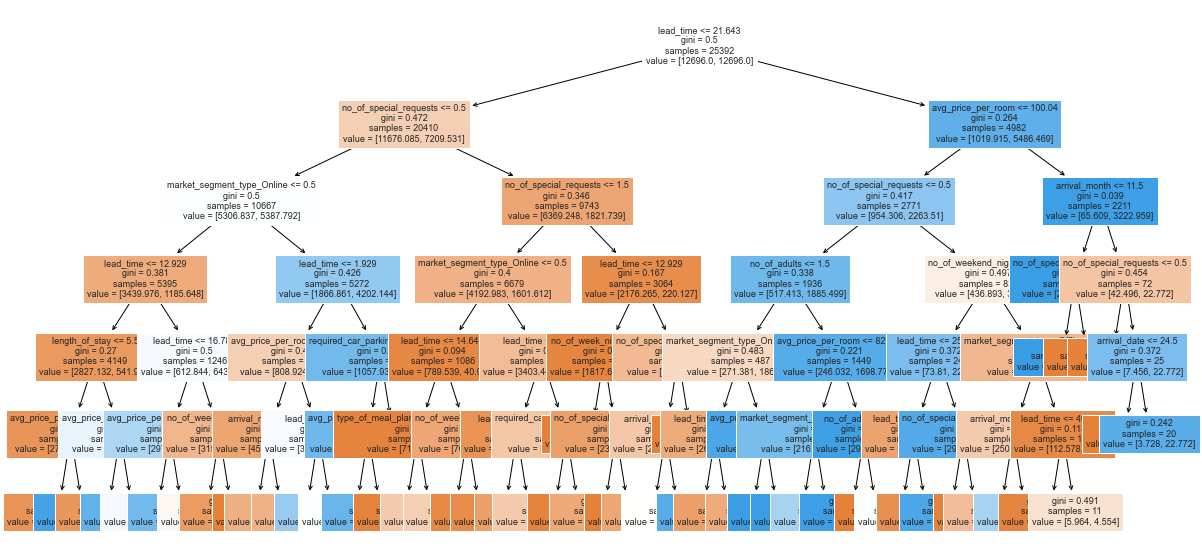

In [91]:
# Decision tree visualization
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# For loop to add arrows
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [92]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 21.64
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 12.93
|   |   |   |   |--- length_of_stay <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- weights: [2739.90, 419.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |   |--- weights: [1.49, 25.81] class: 1
|   |   |   |   |--- length_of_stay >  5.50
|   |   |   |   |   |--- avg_price_per_room <= 92.80
|   |   |   |   |   |   |--- weights: [68.59, 12.14] class: 0
|   |   |   |   |   |--- avg_price_per_room >  92.80
|   |   |   |   |   |   |--- weights: [17.15, 85.01] class: 1
|   |   |   |--- lead_time >  12.93
|   |   |   |   |--- lead_time <= 16.79
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

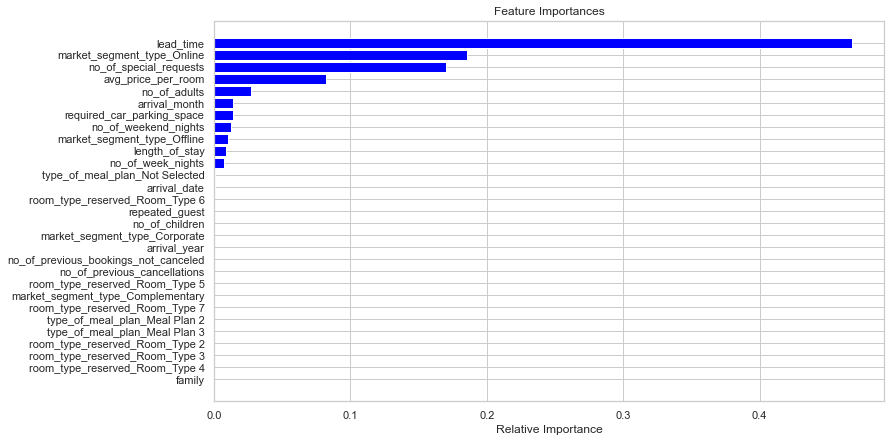

In [93]:
# Importance of features
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Top three important features after pre-pruning are lead time, market segment type online and number of special requests.

**Post-pruning**

In [94]:
# Cost complexity pruning
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [95]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1837,0.0,0.3
1838,0.0,0.3
1839,0.0,0.4
1840,0.0,0.4


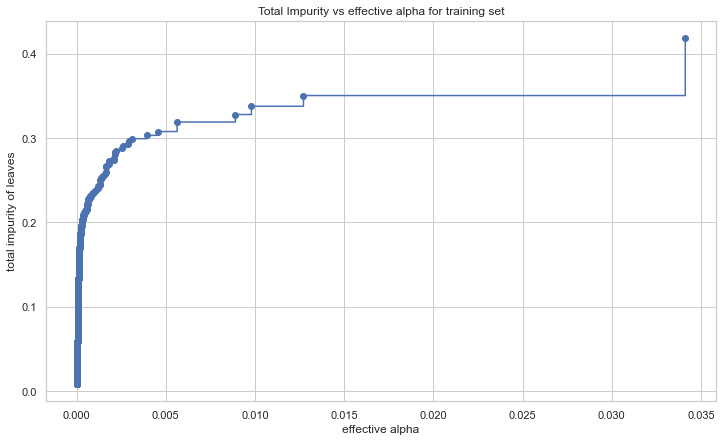

In [96]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [97]:
# Training the decision tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137304


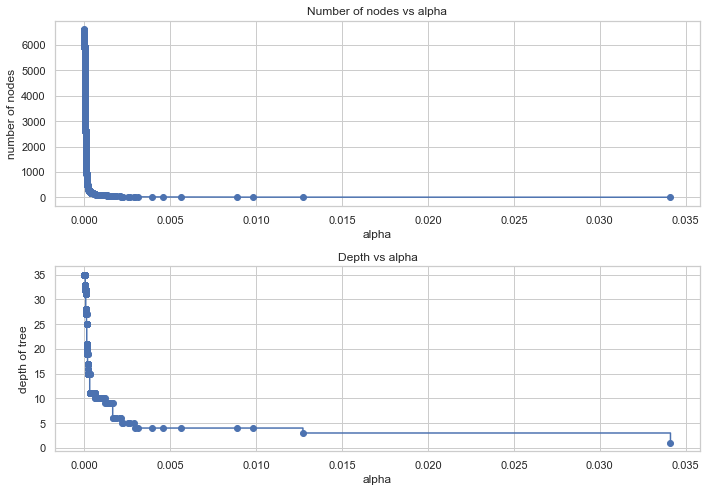

In [98]:
# Removing last element in clfs and ccp alphas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [99]:
# Looking at F1 score and alpha for training and test sets
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

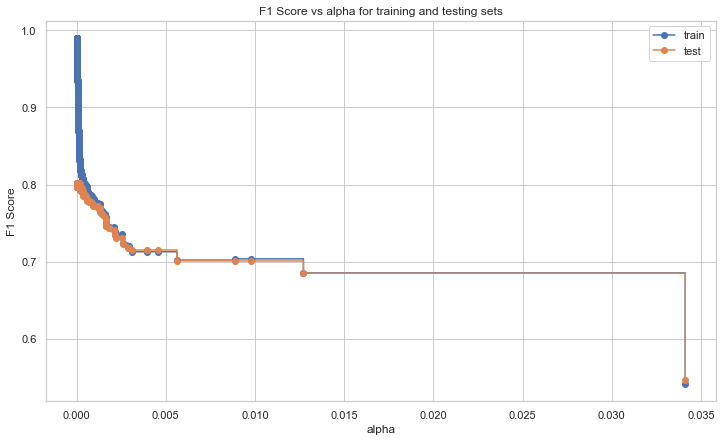

In [100]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [101]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=7.993740069948972e-05, class_weight='balanced',
                       random_state=1)


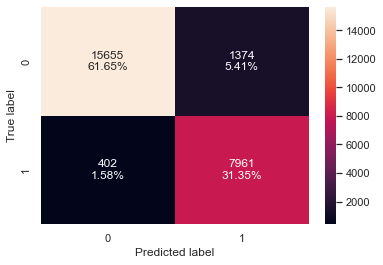

In [102]:
# Checking model performance on training set
confusion_matrix_sklearn(best_model, X_train, y_train)

In [103]:
dtree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
dtree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.9,1.0,0.9,0.9


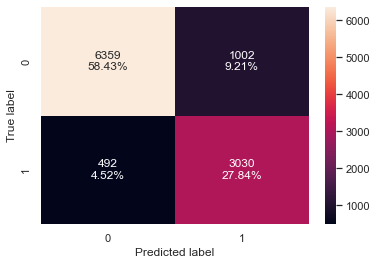

In [104]:
# Checking model performance on testing set
confusion_matrix_sklearn(best_model, X_test, y_test)

In [105]:
dtree_post_perf_test = model_performance_classification_sklearn(best_model, X_test, y_test)
dtree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.9,0.9,0.8,0.8


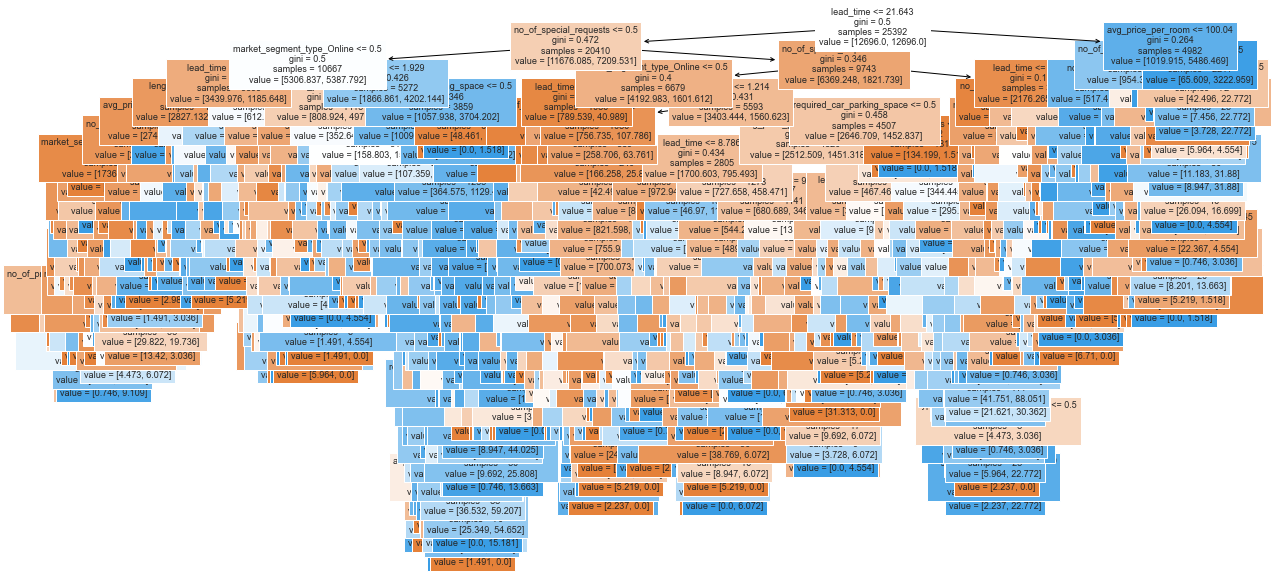

In [106]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [107]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 21.64
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 12.93
|   |   |   |   |--- length_of_stay <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- lead_time <= 2.36
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- lead_time >  2.36
|   |   |   

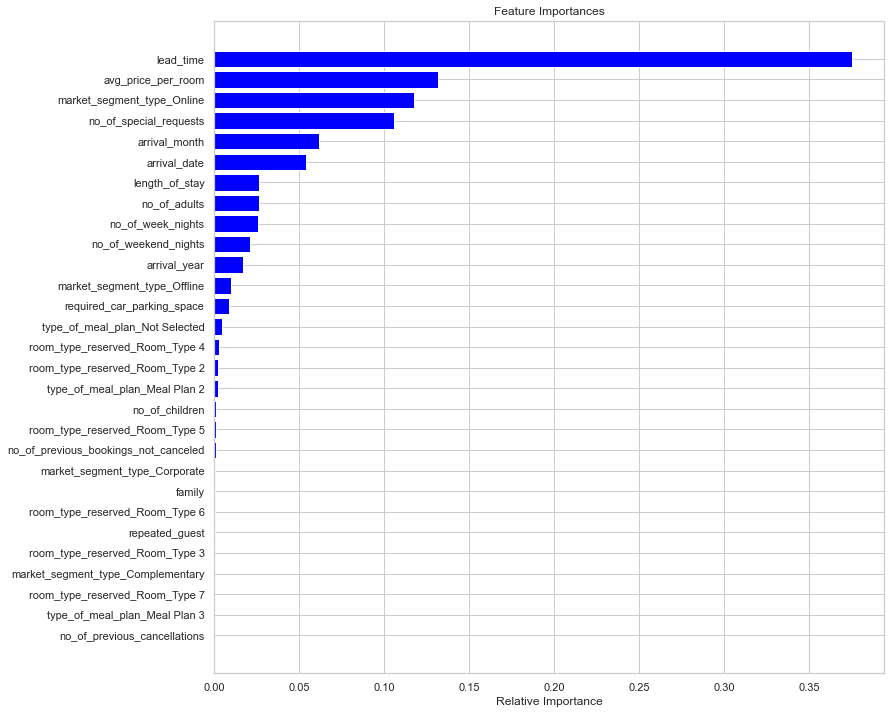

In [108]:
# Looking at importances for the best model
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time, average price per room, and the online market segment type are the most important features for the post-pruned tree.

## Model Performance Comparison and Conclusions

In [109]:
# Training model final comparison
models_train_comp_df = pd.concat(
    [
        dtree_perf_train.T,
        dtree_tune_perf_train.T,
        dtree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.8,0.9
Recall,1.0,0.8,1.0
Precision,1.0,0.7,0.9
F1,1.0,0.8,0.9


In [110]:
# Testing model final comparison
models_test_comp_df = pd.concat(
    [
        dtree_perf_test.T,
        dtree_tune_perf_test.T,
        dtree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.9,0.8,0.9
Recall,0.8,0.8,0.9
Precision,0.8,0.7,0.8
F1,0.8,0.8,0.8


**Conclusions on model performance and comparison**
- Decision tree models with pre-pruning and post-pruning both are giving equally high F1 scores on both train and test sets.
- However, we will choose the pre-pruned tree as the best model since the recall seems to be overfitting in the training set of the post-pruned tree compared to the pre-pruned tree.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

**EDA insights:**
- The majority of guests only come for breakfast.
- Room type 1 is the most popular choice.
- 64% of bookings come through the online market segment, and 29% from the offline market.
- There is a positive correlation with the average price per room and families, the more people to book for, the more costly it will be. This could be due to booking bigger rooms that cost more to accomodate for parents and children.
- Around 30% of guests have canceled their booking that have not required car parking space, compared to 10% of canceled bookings that required car parking space.
- Most cancelations happen in the middle of the year during the months of May, June and July. Majority of these cancelations are also not repeated guests.
- The online market has the most cancelations. The offline and aviation markets have about the same percentage of cancelations.
- Longer length of stays are more likely to get canceled.
- Repeated guests are less likely to cancel.

**Decision tree insights:**
- The model built can be used to predict if a guest is going to cancel their booking or not and can correctly identify 80% of booking cancelations.
- Lead time, average price per room, and the online market segment type are the most important variables in predicting whether a guest will cancel their booking or not.
- From the decision tree, it has been observed that if the lead time is <= 21.6 weeks, the number of special reqests is <= 0.5, the online market segment type is <=0.5, the lead time again is <= 12.93, the total length of stay is <= 5.5 days, and the average price per room is > 201.5, then the guest is most likely to fail.

1. What profitable policies for cancellations and refunds can the hotel adopt?
- The hotel can introduce cancelation policies such as, if a guest cancels at least 14 days prior to the booking date, then they can recieve a full refund, if they cancel at least 7 days prior to the booking date, they can recieve a 50% refund, and if they cancel within a week or are a no show, then they do not get a refund.
- The hotel could also offer the customer a credit or booking date change instead of a full or partial refund.

2. What other recommedations would you suggest to the hotel?
- I would suggest the hotel look into annual memberships or rates for the aviation and corporate markets. This could increase the amount of companies and airlines looking for accomodation for their employees to stay in. It can also boost the hotels brand name.
- As most cancelations happen during the middle of the year, they should investigate events or possible reasons cancelations are higher during this time of the year.
- The hotel should make sure their cancelation policies are clear on the online market as most bookings come through here, and they are also the highest market segement for cancelations.